###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [3]:
college_1 = pd.read_csv("college_1.csv")
college_2 = pd.read_csv("college_2.csv")

data = pd.concat([college_1, college_2])
data

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
30,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
31,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
32,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
33,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [4]:
data.loc[data["CodeKata Score"] > 15000].to_csv("Exceeded expectations.csv")
data.loc[(data["CodeKata Score"] > 10000) & (data["CodeKata Score"] < 15000)].to_csv("Reached_expectations.csv")
data.loc[(data["CodeKata Score"] > 7000) & (data["CodeKata Score"] < 10000)].to_csv("Needs Improvement.csv")
data.loc[data["CodeKata Score"] < 7000].to_csv("Unsatisfactory.csv")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [9]:
print("Average of Previous Geekions: ", data["Previous Geekions"].mean())
print("Average of CodeKata Score: ", data["CodeKata Score"].mean())

Average of Previous Geekions:  3842.3529411764707
Average of CodeKata Score:  4051.764705882353


###### No of students participated 

In [109]:
print("Total Number of Students : ", data[data.columns[0]].count())

Total Number of Students :  119


###### #Average completion of python course or my_sql or python english or computational thinking

In [23]:
print("Python Completion Average: ", data["python"].mean())

Python Completion Average:  54.35294117647059


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [36]:
data = data.assign(student_perfomance = data["Previous Geekions"] - data["CodeKata Score"])
data.sort_values(by = "student_perfomance", ascending=False).head(3)["Name"]

0          A.Dharani
73    rajesh kumar.r
71       m.keerthana
Name: Name, dtype: object

###### Shining stars of the week (top 3 candidates who has highest geekions)

In [41]:
data.nlargest(3, "CodeKata Score")["Name"]

0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Department wise codekata performence (pie chart)

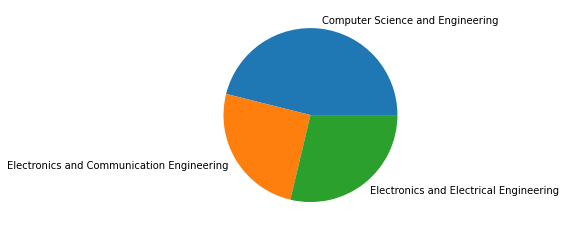

In [49]:
plt.pie(np.array(data.groupby(by = "Department")["CodeKata Score"].mean()), labels = ["Computer Science and Engineering", "Electronics and Communication Engineering", "Electronics and Electrical Engineering"])
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

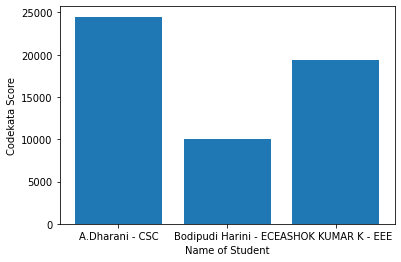

In [108]:
dpt_performers = {}

computer = data.loc[data["Department"] == "Computer Science and Engineering"]
dpt_performers[computer.nlargest(1, "CodeKata Score")["Name"].to_string(index = False)+ " - CSC"] = computer["CodeKata Score"].max()

ece = data.loc[data["Department"] == "Electronics and Communication Engineering"]
dpt_performers[ece.nlargest(1, "CodeKata Score")["Name"].to_string(index = False) + " - ECE"] = ece["CodeKata Score"].max()

eee = data.loc[data["Department"] == "Electronics and Electrical Engineering"]
dpt_performers[eee.nlargest(1, "CodeKata Score")["Name"].to_string(index = False)+ " - EEE"] = eee["CodeKata Score"].max()

names = list(dpt_performers.keys())
scores = list(dpt_performers.values())

plt.bar(names, scores, tick_label=names)
plt.xlabel("Name of Student")
plt.ylabel("Codekata Score")
plt.show()